## Collating the data into one data file

In [1]:
import numpy as np
import scipy.interpolate

from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv
Level 60:root:Processing file: January 15 2024.csv
Level 60:root:Processing file: January 16 2024.csv
Level 60:root:Processing file: January 17 2024.csv
Level 60:root:Processing file: January 18 2024.csv
Level 60:root:Processing file: January 20 2024.csv
Level 60:root:Processing file: January 23 2024.csv
Level 60:root:Processing file: January 24 2024.csv
Level 60:root:Processing file: January 25 2024.csv
Level 60:root:Processing file: January 26 2024.csv
Level 60:

In [2]:
import pandas as pd
from utils import *

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.55
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.68
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.08
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.13
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.36
...,...,...,...,...,...,...,...,...,...,...
702,CA135087D507,CAD,2.25,4.36%,Aaa,6/1/2025,97.19,97.20,6/30/2014,97.19
703,CA135087Q640,CAD,3.50,4.29%,Aaa,8/1/2025,98.73,98.84,5/12/2023,98.73
704,CA135087Q806,CAD,4.50,4.16%,Aaa,11/1/2025,100.45,100.46,8/4/2023,100.45
705,CA135087R226,CAD,4.50,3.97%,Aaa,2/1/2026,100.62,101.04,11/1/2023,100.62


In [5]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop('index', axis=1, inplace=True)

In [8]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,4.99%,Aaa,6/1/2024,99.15,99.16,7/2/2013,99.15
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [9]:
data.to_csv('data/cleaned_data.csv', index=False)

In [10]:
data = pd.read_csv('data/cleaned_data.csv')

In [11]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,4.99%,Aaa,6/1/2024,99.15,99.16,7/2/2013,99.15
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [12]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [13]:
data = get_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Par Value"] = 1000
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coupon Payment"] = df["Par Value"] * df["Coupon"] / 200
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,4.99%,Aaa,2024-06-01,99.15,99.16,2013-07-02,99.15,1000,12.500,101.300685,23.0,0.161601,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.76%,Aaa,2024-03-01,99.76,99.77,2018-10-05,99.76,1000,11.250,101.695616,11.0,0.272101,25,0.833333
7,CA135087J967,CAD,1.500,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,1000,7.500,99.370411,11.0,0.254624,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


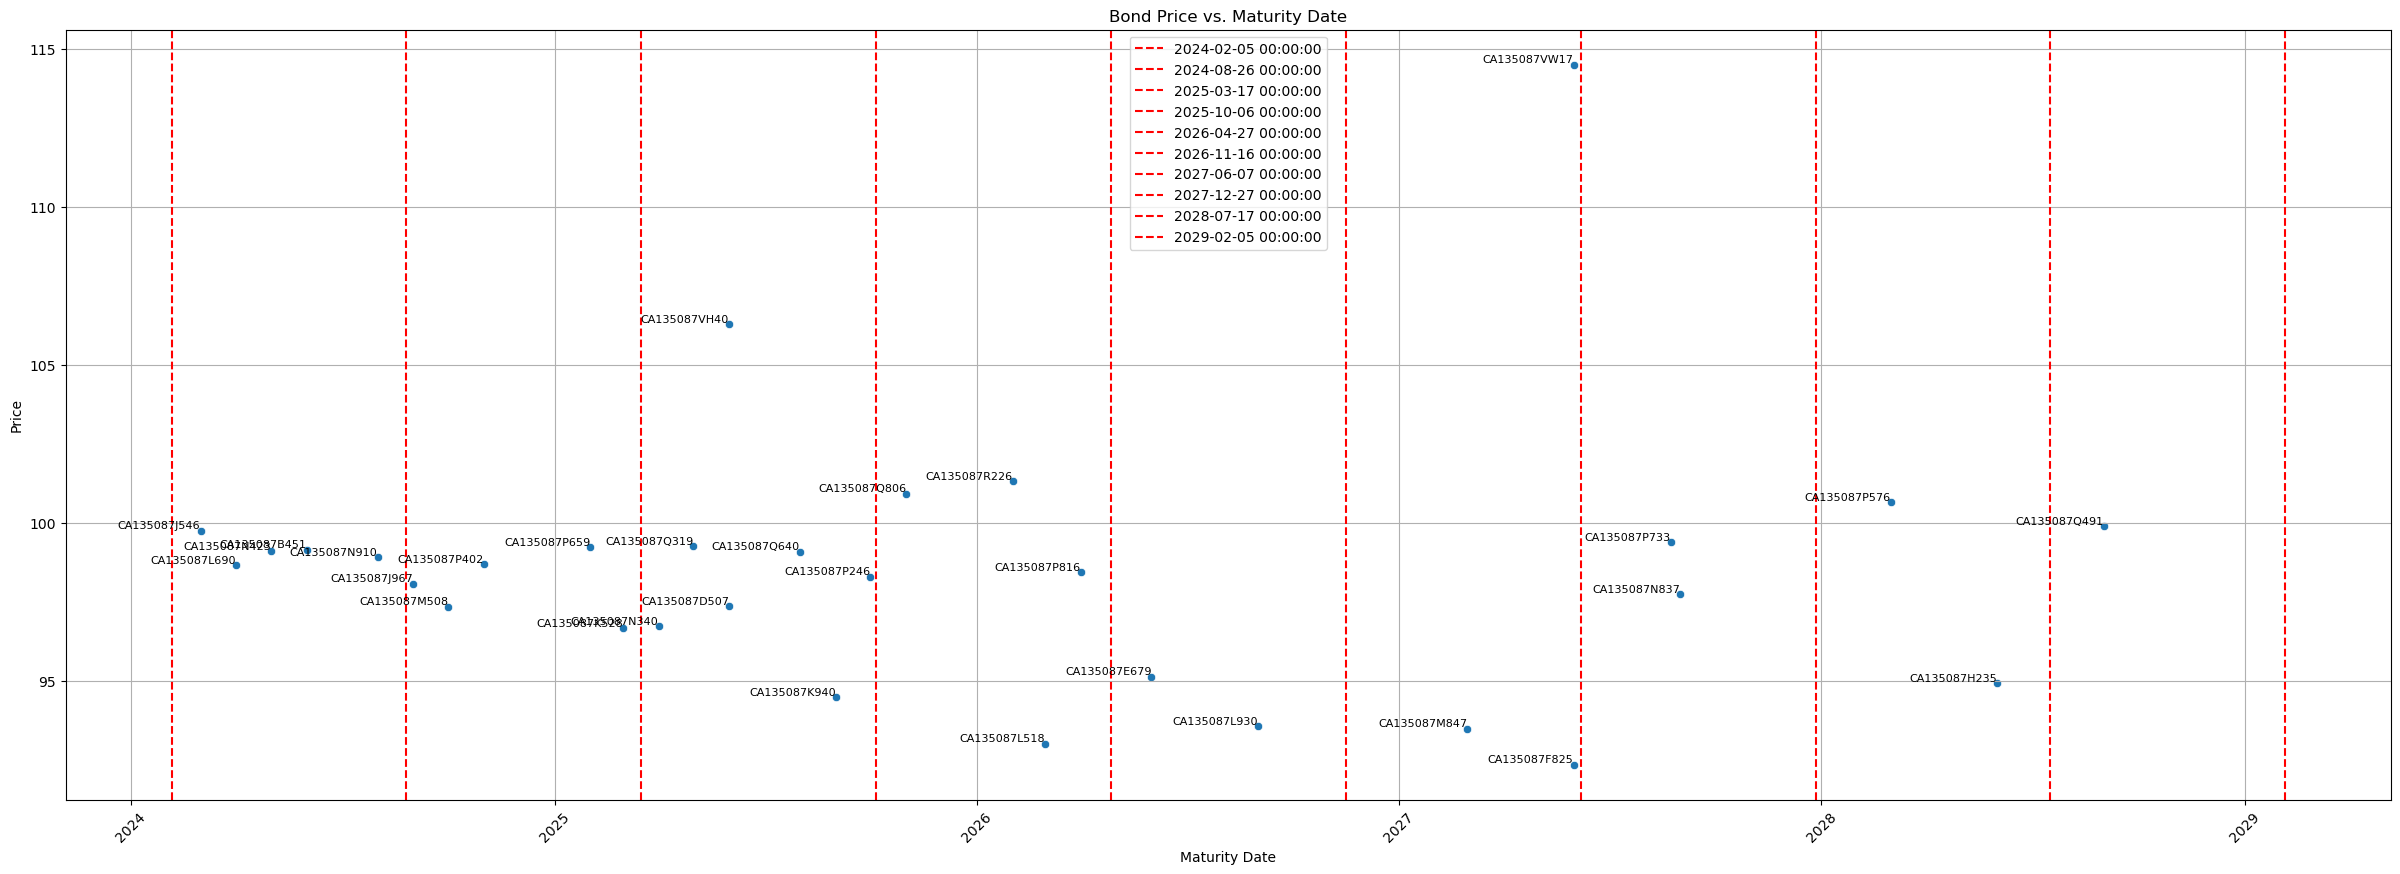

In [15]:
plot_bonds_price(data)

In [16]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,4.99%,Aaa,2024-06-01,99.15,99.16,2013-07-02,99.15,1000,12.500,101.300685,23.0,0.161601,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000
6,CA135087J546,CAD,2.250,4.76%,Aaa,2024-03-01,99.76,99.77,2018-10-05,99.76,1000,11.250,101.695616,11.0,0.272101,25,0.833333
7,CA135087J967,CAD,1.500,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,1000,7.500,99.370411,11.0,0.254624,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667


In [17]:
data["Maturing Month"] = data[("Maturity Date")].dt.month

In [18]:
data = zero_coupon_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df["Zero_Yield"] = np.log((zero_df["Par Value"] + zero_df["Coupon Payment"]) / zero_df["Dirty Price"]) / \


In [19]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,99.295616,23.0,0.155569,482,16.066667,6,NaN
1,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,96.420411,23.0,0.138394,847,28.233333,6,NaN
2,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,93.210274,22.0,0.131443,1212,40.400000,6,NaN
3,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,96.650548,22.0,0.154175,1578,52.600000,6,NaN
4,CA135087J967,CAD,1.500,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,1000,7.500,99.370411,11.0,0.254624,209,6.966667,9,NaN
5,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,97.745342,11.0,0.248408,390,13.000000,3,NaN
6,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.920137,11.0,0.230807,574,19.133333,9,NaN
7,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.235068,11.0,0.224626,755,25.166667,3,NaN
8,CA135087L930,CAD,1.000,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.000,94.430274,11.0,0.241421,939,31.300000,9,NaN
9,CA135087M508,CAD,0.750,4.75%,Aaa,2024-10-01,97.35,97.36,2021-07-12,97.35,1000,3.750,97.995205,7.0,0.363960,239,7.966667,10,NaN


In [20]:
# data = data[data["Compounding Periods"]==11.0]
data = data.query("`Maturing Month`==3 or `Maturing Month`==9")
data = data.reset_index(drop=True)

In [21]:
data = data.sort_values(by=['Months to Maturity'])
data = data.reset_index(drop=True)

In [22]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield
0,CA135087J546,CAD,2.25,4.76%,Aaa,2024-03-01,99.76,99.77,2018-10-05,99.76,1000,11.25,101.695616,11.0,0.272101,25,0.833333,3,2.75635
1,CA135087J967,CAD,1.50,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,1000,7.50,99.370411,11.0,0.254624,209,6.966667,9,NaN
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN


In [23]:
data.to_csv("data/final.csv", index=False)

In [24]:
data["Years to Maturity"] = data["Months to Maturity"]/12

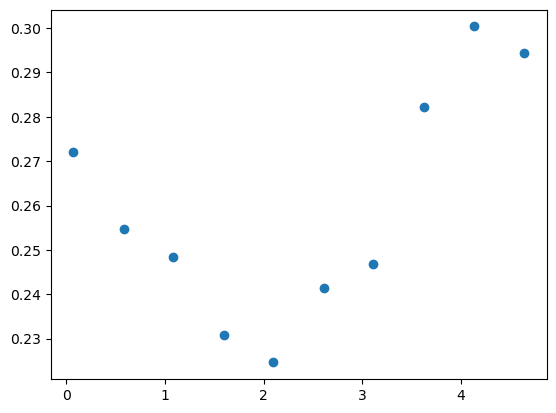

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x="Years to Maturity", y="YTM", data=data)

In [26]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity
0,CA135087J546,CAD,2.25,4.76%,Aaa,2024-03-01,99.76,99.77,2018-10-05,99.76,1000,11.25,101.695616,11.0,0.272101,25,0.833333,3,2.75635,0.069444
1,CA135087J967,CAD,1.50,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,1000,7.50,99.370411,11.0,0.254624,209,6.966667,9,NaN,0.580556
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889


In [27]:
x = [0.5]
for i in range(9):
    x.append(x[-1]+0.5)

In [28]:
data["Speard"] = x

In [29]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,...,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Maturing Month,Zero_Yield,Years to Maturity,Speard
0,CA135087J546,CAD,2.25,4.76%,Aaa,2024-03-01,99.76,99.77,2018-10-05,99.76,...,11.25,101.695616,11.0,0.272101,25,0.833333,3,2.75635,0.069444,0.5
1,CA135087J967,CAD,1.50,4.79%,Aaa,2024-09-01,98.08,98.09,2019-04-05,98.08,...,7.50,99.370411,11.0,0.254624,209,6.966667,9,NaN,0.580556,1.0
2,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,...,6.25,97.745342,11.0,0.248408,390,13.000000,3,NaN,1.083333,1.5
3,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,...,2.50,94.920137,11.0,0.230807,574,19.133333,9,NaN,1.594444,2.0
4,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,...,1.25,93.235068,11.0,0.224626,755,25.166667,3,NaN,2.097222,2.5
5,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,...,5.00,94.430274,11.0,0.241421,939,31.300000,9,NaN,2.608333,3.0
6,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,...,6.25,94.565342,11.0,0.246899,1120,37.333333,3,NaN,3.111111,3.5
7,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,...,13.75,100.115753,11.0,0.282173,1304,43.466667,9,NaN,3.622222,4.0
8,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,...,17.50,103.660959,11.0,0.300348,1486,49.533333,3,NaN,4.127778,4.5
9,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,...,16.25,102.695890,11.0,0.294392,1670,55.666667,9,NaN,4.638889,5.0


In [30]:
from Bonds import Bonds
bonds = Bonds(data)

Bootstrapping for CA135087J546
{0: 0, 179: 0.006726136621984592}
Bootstrapping for CA135087J967
Bootstrapping for day: 3
0 179
Bootstrapping for day: 183
179 0
Bootstrapping for day: 363
{0: 0, 179: 0.006726136621984592, 3: 0.00011272854673717193, 183: 0.006876441350967488, 363: 0.02703971594067033}
Bootstrapping for CA135087K528
Bootstrapping for day: 4
3 179
Bootstrapping for day: 184
183 0
Bootstrapping for day: 364
363 0
Bootstrapping for day: 544
{0: 0, 179: 0.006726136621984592, 3: 0.00011272854673717193, 183: 0.006876441350967488, 363: 0.02703971594067033, 4: 0.00015030472898289591, 184: 0.006914017533213212, 364: 0.02711420551626446, 544: 0.06053768242622835}
Bootstrapping for CA135087K940
Bootstrapping for day: 8
4 179
Bootstrapping for day: 188
184 363
Bootstrapping for day: 368
364 0
Bootstrapping for day: 548
544 0
Bootstrapping for day: 728
{0: 0, 179: 0.006726136621984592, 3: 0.00011272854673717193, 183: 0.006876441350967488, 363: 0.02703971594067033, 4: 0.000150304728982

In [31]:
bonds._bonds

[Bond(isin='CA135087J546', coupon=2.25, price=99.76, par=101.125, issue=Timestamp('2018-10-05 00:00:00'), maturity=Timestamp('2024-03-01 00:00:00'), coupon_payment=1.13765625, number_days_last_payment=1, maturity_days=179, dirty_price=99.76625, payments=[179]),
 Bond(isin='CA135087J967', coupon=1.5, price=98.08, par=100.75, issue=Timestamp('2019-04-05 00:00:00'), maturity=Timestamp('2024-09-01 00:00:00'), coupon_payment=0.755625, number_days_last_payment=1, maturity_days=363, dirty_price=98.08416666666666, payments=[3, 183, 363]),
 Bond(isin='CA135087K528', coupon=1.25, price=96.67, par=100.625, issue=Timestamp('2019-10-11 00:00:00'), maturity=Timestamp('2025-03-01 00:00:00'), coupon_payment=0.62890625, number_days_last_payment=1, maturity_days=544, dirty_price=96.67347222222223, payments=[4, 184, 364, 544]),
 Bond(isin='CA135087K940', coupon=0.5, price=94.49, par=100.25, issue=Timestamp('2020-04-03 00:00:00'), maturity=Timestamp('2025-09-01 00:00:00'), coupon_payment=0.250625, number_

In [32]:
bonds._yield

{0: 0,
 179: 0.006726136621984592,
 3: 0.00011272854673717193,
 183: 0.006876441350967488,
 363: 0.027020743725000476,
 4: 0.00015030472898289591,
 184: 0.006973903842868955,
 364: 0.02709902774372858,
 544: 0.060475618756548465,
 8: 0.00030060945796579183,
 188: 0.007371239599181791,
 368: 0.027410266597074007,
 548: 0.06097505448535827,
 728: 0.1195469093226112,
 9: 0.0003381856402115158,
 189: 0.007482176510755801,
 369: 0.0275766343749382,
 549: 0.061087888581560244,
 729: 0.11972812575410807,
 909: 0.18569318460818865,
 13: 0.0004884903691944118,
 193: 0.007926672735922534,
 373: 0.028253353108982852,
 553: 0.06153844917049715,
 733: 0.12044454765144132,
 913: 0.186616113466746,
 1093: 0.22340789925427706,
 14: 0.0005260665514401357,
 194: 0.008038957089463797,
 374: 0.028439966607505238,
 554: 0.06182743940591197,
 734: 0.12061056519136057,
 914: 0.18682051227667673,
 1094: 0.2236122980642078,
 1274: 0.26040408385173885,
 18: 0.0006763712804230316,
 198: 0.008488194314144945,
 37

<Axes: >

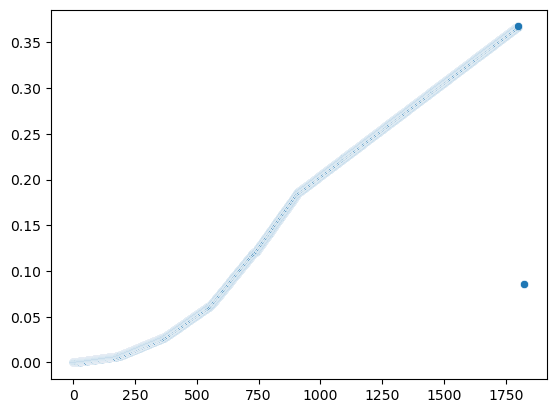

In [41]:
sns.scatterplot(x=list(bonds._yield.keys())[:-1], y=list(bonds._yield.values())[:-1])

In [34]:
bonds.forward_rates[1]

[0,
 9.517830994274235,
 4.792673476355542,
 3.215400288291215,
 2.425429247853919,
 1.9514779371990325,
 1.635536491435351,
 1.409886397038072,
 1.2405811250527135,
 1.1126054418945186,
 1.0102581689235357,
 0.9265497397250705,
 0.8568204433559936,
 0.7981670463345444,
 0.7481584574218166,
 0.704842562163922,
 0.6669644805005798,
 0.633564598268045,
 0.6039280422377626,
 0.577430925071882,
 0.5536137285316319,
 0.5320828090956665,
 0.5125264017043105,
 0.4946869613082672,
 0.4783522516222591,
 0.46333942767845626,
 0.4494959641989122,
 0.43669193224315356,
 0.4248159641479177,
 0.41377205330694367,
 0.4034769939948051,
 0.39385831670871163,
 0.38485261063372145,
 0.3764041511142798,
 0.3684637693366617,
 0.36098791578013956,
 0.35393787975962193,
 0.34727913552894635,
 0.34098079163101996,
 0.33501512496332364,
 0.3293571847335902,
 0.32398445437318807,
 0.3188765617485937,
 0.31401502980847157,
 0.3093830612334259,
 0.30496535179911827,
 0.3007479280833266,
 0.296718005891252,
 0.292

<Axes: >

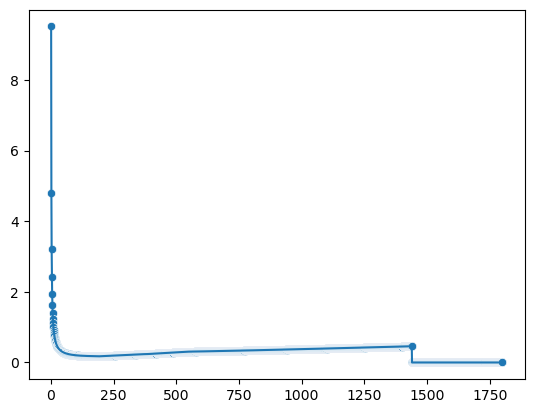

In [39]:
sns.scatterplot(x = list(range(1,len(bonds.forward_rates[1]))), y=bonds.forward_rates[1][1:])
sns.lineplot(x = list(range(1,len(bonds.forward_rates[1]))), y=bonds.forward_rates[1][1:])